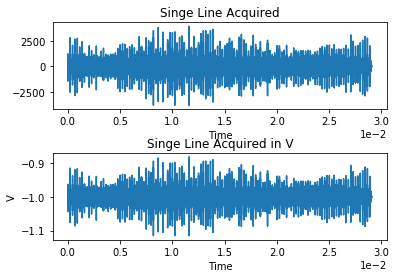

In [1]:
%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

f = open('LabRFdata.bin','rb')   
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() 
x=np.arange(0,L/18e6,1/18e6)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

### We will analyze this signal visually (zoom) to estimate the frequency of the transducer used.

We will then perform a Fourier transform to obtain the central frequency of the transducer.

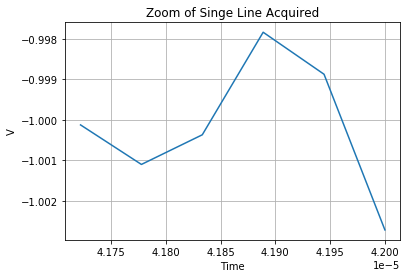

In [2]:
inx1=np.where(x>0.4170e-4)
inx1=inx1[0]
inx2=np.where(x>0.420e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.grid()

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

The maximum is 0.000082 and it is found at index 125312 which is the frequency 4.780273e+06


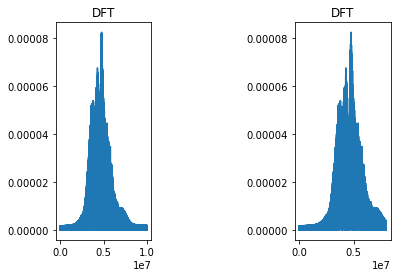

In [3]:
#Eliminating dc
LineF-=np.mean(LineF)

f=np.arange(0,20e6/2,20e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L

plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=len(Pyy)/2

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


PyyM=Pyy[:L2]
mm=np.argmax(PyyM) #this gives the index where the max is found
print("The maximum is %f and it is found at index %d which is the frequency %e" % (max(PyyM),mm,f[mm]))

We can see that the frequency of that transducer is $4.78MHz$ and as you can see, using the DFT gave us more precision than estimation.

Assuming that the tissues have attenuated this signal $4Np/m/MHz$ we will compensate for this attenuation and plot the real time-gain-compensated signal. The attenuation is exponential so we can compensate using:

$$ RF_{com}=RF e^{\mu d}\;\;\mu=\alpha f\;\;\;\;\;d=ct\;\;\;c\approx 1450m/s$$


C:\Users\sagar\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


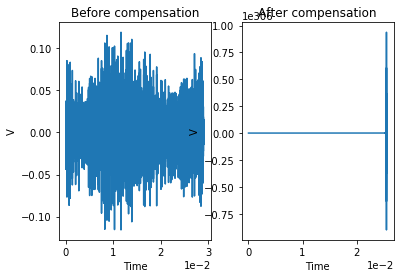

In [4]:
#Compensating
h=x*1450
ffatt=np.exp(4*4.78*h)
LineC=LineF*ffatt
#Plotting
plt.subplot(121)
plt.plot(x,LineF[:L])
plt.title('Before compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineC[:L])
plt.title('After compensation')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

To prepare for forming an image, we will now obtain the envelope of the signal and plot. This is done using a Hilbert transform.

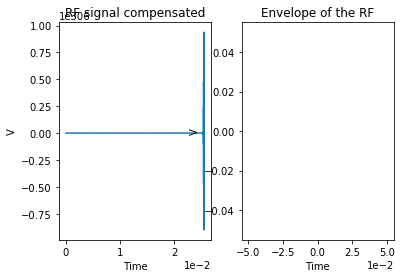

In [5]:
#Hilbert Transform
LineE=hilbert(LineC)
LineE=abs(LineE)

plt.subplot(121)
plt.plot(x,LineC[:L])
plt.title('RF signal compensated')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(122)
plt.plot(x,LineE[:L])
plt.title('Envelope of the RF')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

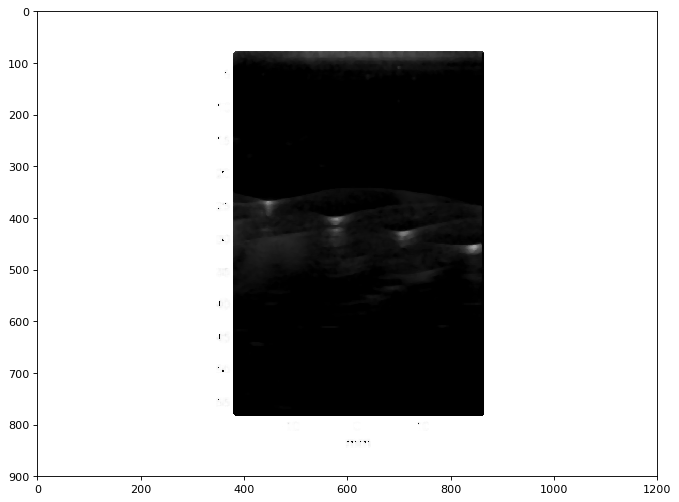

In [7]:
from skimage import novice, data, io, exposure
import matplotlib.image as mpimg
import scipy.ndimage as ndimage
from scipy.signal import medfilt
img = novice.open('picture.jpg')
ima= mpimg.imread('picture.jpg','True') 
image = ndimage.median_filter(ima,7)
fig=plt.figure(figsize=(10,10), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(image)
plt.show()